# Data Science Workflow

## Aakash Tandel 
aakashtandel.com

https://github.com/aakashtandel

There is no template for solving a data science problem. The roadmap changes with every new dataset and new problem. But we do see similar steps in many different projects. I wanted to make a clean workflow to serve as an example to aspiring data scientists. I also wanted to give people working with data scientists an easy to understand guide to data science.

This is a high-level overview and every step (and almost every sentence) in this overview can be addressed on its own. Many books like *Introduction to Statistical Learning* by Hastie and Tibshirani and many courses like Andrew Ng’s Machine Learning course at Stanford, go into these topics in more detail. The data science community is full of great literature and great resources. Be sure to dive deeper into any topic you find interesting.

## Overview

1.	Objective 
2.	Importing Data 
3.	Data Exploration and Data Cleaning
5.	Baseline Modeling 
6.	Secondary Modeling 
7.	Communicating Results 
8.  Conclusion
9.  Resources

Lastly, I want to say that this process isn’t completely linear. You will jump around as you learn more about the data and find new problems to solve along the way.

Let’s get started!

## 1) Objective 

What is the problem you are trying to solve? Remove modeling, evaluation metrics, and data science from the equation. What is the problem your company faces? What do you want to learn more about? Clearly **stating your problem** is the first step to solving it and without a clear problem, you could find yourself down a data-science rabbit-hole. 

For this workflow, we are going to analyze the highest ranked movies on IMDB.com. I want to build a model to predict IMDB movie rating based on features like budget, runtime, and votes on the website. 

## 2) Importing Data

Data can come from a variety of sources. You can import CSV files from your local machine, query SQL servers, or use a web scraper to strip data from the Internet. I like to use the Python library, **Pandas**, to import data. Pandas is a great open-source data analysis library. We will also be using Pandas in the data cleaning step of this workflow. 

For this example, we are going to import data from our local machine. I will be using a dataset from Kaggle.com’s user Sai Pranav. The dataset is titled “Top Ranked English Movies of this Decade” and it was in a CSV file. 

https://www.kaggle.com/saipranava/top-ranked-enlglish-movies-of-this-decade/data

In [1]:
import pandas as pd 
df = pd.read_csv('/Users/aakashtandel/Downloads/IMDB.csv', index_col=0, encoding='latin-1')

I do want to say right off the bat that this dataset is pretty small. The number of observations is relatively few. But because this is only an example problem, I am okay with proceeding. In industry, you would definitely want a larger dataset.

## 3) Data Exploration and Data Cleaning

Now that we have our data imported into Pandas, we can check out the first few rows of our dataframe. 

In [2]:
df.head()

Title  Rating TotalVotes     Genre1     Genre2   Genre3  \
1  12 Years a Slave (2013)     8.1    496,092  Biography      Drama  History   
2         127 Hours (2010)     7.6    297,075  Adventure  Biography    Drama   
3             50/50 (2011)     7.7    283,935     Comedy      Drama  Romance   
4        About Time (2013)     7.8    225,412     Comedy      Drama  Fantasy   
5             Amour (2012)     7.9     76,121      Drama    Romance      NaN   

   MetaCritic        Budget  Runtime  ï..CVotes10   ...     Votes3044  \
1        96.0  $20,000,000   134 min        75556   ...           8.0   
2        82.0  $18,000,000    94 min        28939   ...           7.5   
3        72.0   $8,000,000   100 min        28304   ...           7.6   
4         NaN  $12,000,000   123 min        38556   ...           7.6   
5        94.0   $8,900,000   127 min        11093   ...           7.7   

   Votes3044M  Votes3044F  Votes45A  Votes45AM  Votes45AF  VotesIMDB  \
1         7.9         8.0       7.8        7.8        8.1        8.0   
2         7.5         7.5       7.3        7.3        7.5        7.6   
3         7.6         7.6       7.4        7.4        7.5        7.4   
4         7.6         7.7       7.6        7.5        7.8        7.7   
5         7.7         7.9       7.9        7.8        8.1        6.6   

   Votes1000  VotesUS VotesnUS  
1        7.7      8.3      8.0  
2        7.0      7.7      7.6  
3        7.0      7.9      7.6  
4        6.9      7.8      7.7  
5        7.2      7.9      7.8  

[5 rows x 54 columns]

There are three distinctions I like to make from the get-go. Is this supervised learning or unsupervised learning? Is this a classification problem or is it a regression problem? Is this a prediction problem or an inference problem? 

**Supervised or Unsupervised Learning**: With Supervised learning, we have clearly labeled dependent and independent variables. The dependent variable (our target) is known. If we are looking at a linear regression, our *y* variable is obvious. If we do have a clearly labeled *y* variable, we are performing supervised learning because the computer is learning from our clearly labeled dataset. It is learning the relationship between our *x* variables and our *y* variables. Supervised learning can be broken down into regression and classification problems. With unsupervised learning, we do not have a clear dependent variable. We have a feature matrix of x variables and no *y* variable. Unsupervised learning problems can involve clustering and creating associations. I won’t get into clustering in this overview, but it’s a great skillset to learn. Additionally, unsupervised learning can be beneficial from a data exploration perspective. 

**Classification or Regression**: Now that we know we have a supervised learning problem, we can decide whether it is a classification or regression problem. I look at the *y* variable and determine if that variable is a continuous or discrete variable. Categorical *y* variables fall into the classification setting whereas continuous quantitative variables fall into the regression setting. An example of a classification problem would be determining where or not a credit card transaction is fraudulent. This is a binary classification problem because each transaction is either fraudulent or not fraudulent. The classic example of a regression problem is determining the price of a house based on features like square footage, number of bedrooms, and lot size.

**Prediction or Inference**: In a prediction setting, we want our model to estimate a *y* value, given a variety of features. From our regression example above, we would want to feed our model a house that has 1,500 square feet, 2 bedrooms, and a 0.50 acre lot. Our model would then predict that the house was worth $200,000. In an inference setting, we want to know how a feature (*x* variable) affects the output (*y* variable). We could see how the price of a house increases when you add an additional bedroom to the house.

These three sets of questions can offer a lot of guidance when solving your data science problem. 

In our example, we are going to be using regression (supervised learning) to predict IMDB rating from Metacritic Ratings, Budgets, Runtime, and Votes.

Back to the coding part! Let’s determine which variable is our target and which features we think are important. 

In [3]:
df.head()

Title  Rating TotalVotes     Genre1     Genre2   Genre3  \
1  12 Years a Slave (2013)     8.1    496,092  Biography      Drama  History   
2         127 Hours (2010)     7.6    297,075  Adventure  Biography    Drama   
3             50/50 (2011)     7.7    283,935     Comedy      Drama  Romance   
4        About Time (2013)     7.8    225,412     Comedy      Drama  Fantasy   
5             Amour (2012)     7.9     76,121      Drama    Romance      NaN   

   MetaCritic        Budget  Runtime  ï..CVotes10   ...     Votes3044  \
1        96.0  $20,000,000   134 min        75556   ...           8.0   
2        82.0  $18,000,000    94 min        28939   ...           7.5   
3        72.0   $8,000,000   100 min        28304   ...           7.6   
4         NaN  $12,000,000   123 min        38556   ...           7.6   
5        94.0   $8,900,000   127 min        11093   ...           7.7   

   Votes3044M  Votes3044F  Votes45A  Votes45AM  Votes45AF  VotesIMDB  \
1         7.9         8.0       7.8        7.8        8.1        8.0   
2         7.5         7.5       7.3        7.3        7.5        7.6   
3         7.6         7.6       7.4        7.4        7.5        7.4   
4         7.6         7.7       7.6        7.5        7.8        7.7   
5         7.7         7.9       7.9        7.8        8.1        6.6   

   Votes1000  VotesUS VotesnUS  
1        7.7      8.3      8.0  
2        7.0      7.7      7.6  
3        7.0      7.9      7.6  
4        6.9      7.8      7.7  
5        7.2      7.9      7.8  

[5 rows x 54 columns]

Our target is going to be the column titled Rating and our features are going to be the columns titled the following: MetaCritic, Budget, Runtime, VotesUS, VotesnUS, and TotalVotes. I will remove all of the columns we don’t need for this analysis. 

In [4]:
df = df[['Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget', 'Runtime', 'VotesUS', 'VotesnUS']]
df.head(10)

Title  Rating TotalVotes  MetaCritic  \
1      12 Years a Slave (2013)     8.1    496,092        96.0   
2             127 Hours (2010)     7.6    297,075        82.0   
3                 50/50 (2011)     7.7    283,935        72.0   
4            About Time (2013)     7.8    225,412         NaN   
5                 Amour (2012)     7.9     76,121        94.0   
6                  Argo (2012)     7.7    486,840        86.0   
7               Arrival (2016)     8.0    370,842        81.0   
8   Beasts of No Nation (2015)     7.8     51,781        79.0   
9       Before Midnight (2013)     7.9    106,553        94.0   
10           Big Hero 6 (2014)     7.8    315,485        74.0   

                                               Budget  Runtime VotesUS  \
1                                        $20,000,000   134 min     8.3   
2                                        $18,000,000    94 min     7.7   
3                                         $8,000,000   100 min     7.9   
4                                        $12,000,000   123 min     7.8   
5                                         $8,900,000   127 min     7.9   
6                                        $44,500,000   120 min     8.0   
7                                        $47,000,000   116 min     8.0   
8                                         $6,000,000   137 min     7.9   
9                                         $3,000,000   109 min     8.0   
10  Opening Weekend:         56,215,889           ...      NaN     7.9   

   VotesnUS  
1       8.0  
2       7.6  
3       7.6  
4       7.7  
5       7.8  
6       7.6  
7       7.9  
8       7.7  
9       7.9  
10      7.7

Pandas and **Matplotlib** (a popular Python plotting library) are going to assist in the majority of our exploration. **Exploratory data analysis (EDA)** gives the data scientist an opportunity to really learn about the data he or she is working with. Many data scientists find themselves coming back to EDA and the findings he or she found in EDA later on in the process. 

Throughout the EDA process, I clean the data. Data from the real world is very messy. But as I work through the EDA process and learn about the data, I take notes on things I need to fix in order to conduct my analysis. **Data cleaning** and EDA go hand in hand for me. I work between the two for a sizeable amount of time and I often find myself coming back to these stages. 

The first thing I check is data types. Getting all of the values in the correct format is important. This can involve stripping characters from strings, converting integers to floats, or many other things. 

In [5]:
df.dtypes

Title          object
Rating        float64
TotalVotes     object
MetaCritic    float64
Budget         object
Runtime        object
VotesUS        object
VotesnUS       object
dtype: object

In [6]:
df.TotalVotes = df.TotalVotes.str.replace(',', '')
df.TotalVotes = df.TotalVotes.astype(int)
# Total Votes column is ready.

In [7]:
df = df[(df.Budget.str.contains("Opening") == False) & (df.Budget.str.contains("Pathé") == False)]
df.Budget = df.Budget.str.replace('[^\x00-\x7F]','')
df.Budget = df.Budget.str.replace(',', '')
df.Budget = df.Budget.str.replace('$', '')
df.Budget = df.Budget.astype(int)
# Budget column is ready. 

In [8]:
df.Runtime = df.Runtime.str.extract('(\d+)', expand=False)
# Runtime column is now ready. 

**Missing values** and null values are common. Sometimes you have very large matrices with little information in them. These are known as sparse matrices. Handling missing and null values is a whole topic in itself. This topic is known as **missing data imputation** and I can’t get into it here. Be sure to look up more information on this topic, especially if you run into sparse matrices. For our purposes, I am going to simply drop the movies with null values. This isn’t always the best idea, but I have elected to do so in this analysis. 

In [9]:
df = df.dropna()

In [10]:
df.Runtime = df.Runtime.astype(int)
df.VotesnUS = df.VotesnUS.astype(float)
df.VotesUS = df.VotesUS.astype(float)

In [11]:
df.head()

Title  Rating  TotalVotes  MetaCritic    Budget  Runtime  \
1  12 Years a Slave (2013)     8.1      496092        96.0  20000000      134   
2         127 Hours (2010)     7.6      297075        82.0  18000000       94   
3             50/50 (2011)     7.7      283935        72.0   8000000      100   
5             Amour (2012)     7.9       76121        94.0   8900000      127   
6              Argo (2012)     7.7      486840        86.0  44500000      120   

   VotesUS  VotesnUS  
1      8.3       8.0  
2      7.7       7.6  
3      7.9       7.6  
5      7.9       7.8  
6      8.0       7.6

In [12]:
df.dtypes

Title          object
Rating        float64
TotalVotes      int64
MetaCritic    float64
Budget          int64
Runtime         int64
VotesUS       float64
VotesnUS      float64
dtype: object

There are many different ways you can conduct EDA with Pandas on your data. Checking missing values, checking data types, and formatting the data are only the tip of the iceberg. Look for the number of unique values. Use the Pandas describe method to get summary statistics on your columns. Pandas is a very useful tool at this stage of the data analysis process and becoming familiar with data cleaning with Pandas is an essential tool for any data scientist. 

The last part of EDA is plotting. **Plotting** is very important because it allows you to visually inspect your data. Histograms, scatter matrices, and box plots can all be used to offer another layer of insight into your data problem. For this example, we will use Pandas to create a scatter matrix. 

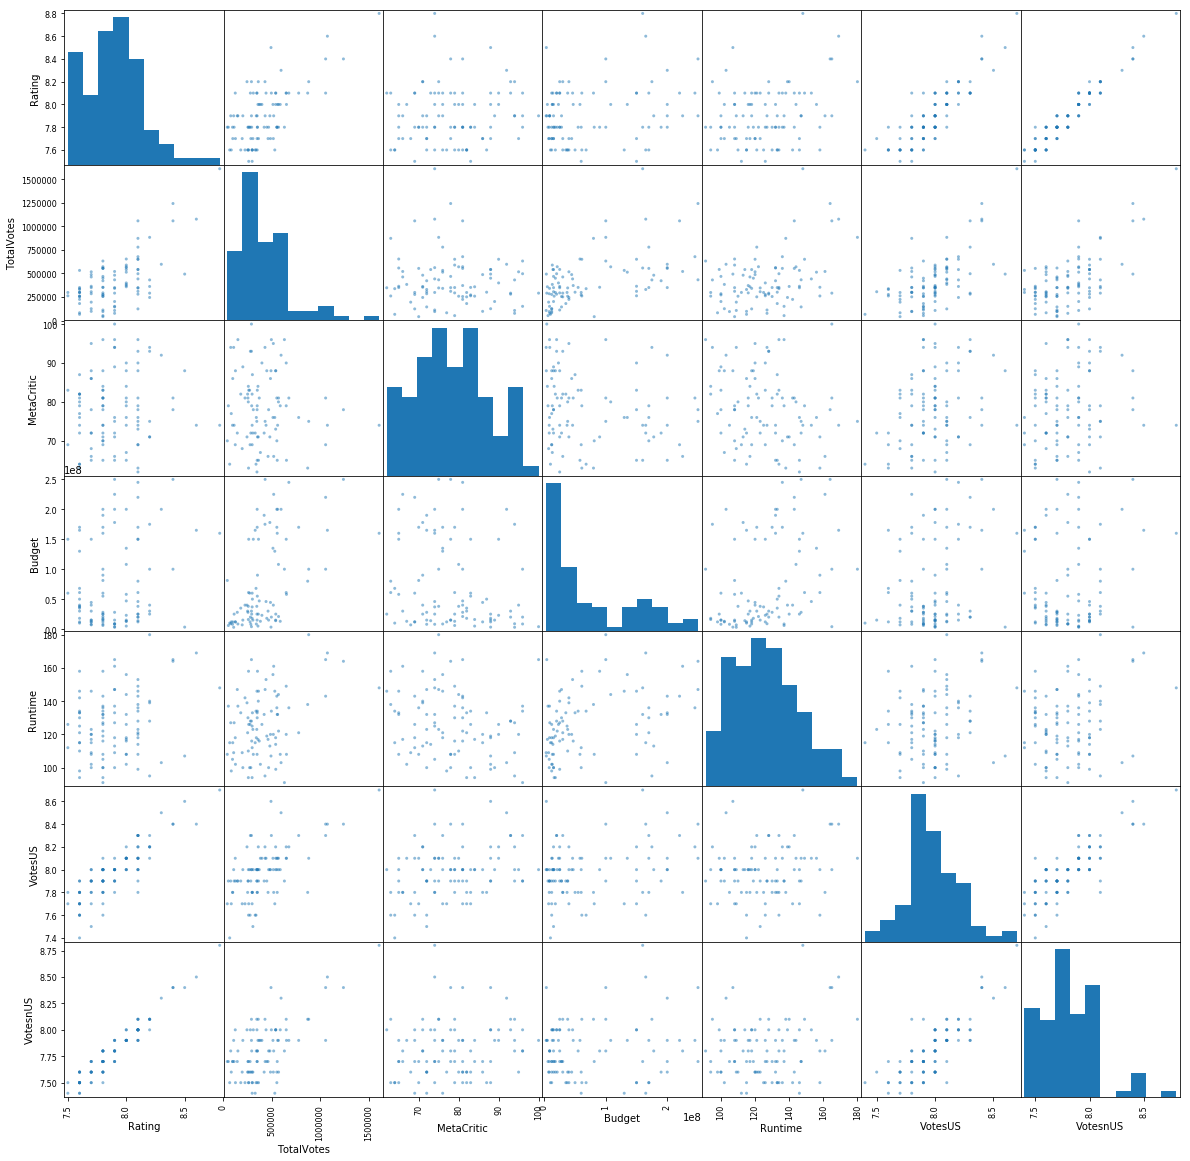

In [13]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show()

In the data exploration and cleaning phase, I also perform **feature engineering**. Feature engineering is the construction of new features from old features. Some basic types of feature engineering would be to create interaction variables from two features or to create lagged variables for time series analysis. Feature engineering is another topic I am going to brush over in this workflow but it shouldn’t be forgotten.

## 4) Baseline Modeling 

As a data scientist, you will build a lot of models. You will use a variety of algorithms to perform a wide variety of tasks. You will need to use intuition and experience to decide when certain models are appropriate. As an economist by trade, I prefer to begin with **linear regression** for my regression problems and **logistic regression** for my classification problems. (I also tend to use **kNN** for baseline classification models and **K-Means** as my first clustering algorithm in unsupervised learning.) These models will give you a baseline upon which you can improve. 

In Kaggle competitions, many of the winners use advanced **neural networks**, **XGBoost**, or **Random Forests** to solve data science problems. All of these will come later and should get us more accurate predictions than linear and logistic regressions. 

**Scikit-Learn** is a machine learning package for Python that can be used for a variety of tasks. We can use Scikit-Learn for modeling (classification, regression, and clustering). It can also be used for dimensionality reduction (Principal Component Analysis), model selection (grid search, evaluation metrics), and preprocessing data. The basics of modeling are similar across different algorithms when you are working within Scikit-Learn.

During model **preprocessing** we are going to separate out our features from our dependent variables, scale the data across the board, and use a **train-test-split** to prevent overfitting of our model. Overfitting is when our model too closely tracks our training data and when it is fed new data, it doesn’t perform well. This means the model won't generalize well to new problems. The model is picking up all of the noise in the training data and memorizing it. Creating a training-test-split helps to combat overfitting. Additionally, we could use **Cross Validation** to prevent overfitting. Be sure to look up more about cross validation on your own.

In [14]:
y = df.Rating
X = df[['TotalVotes', 'MetaCritic', 'Budget', 'Runtime', 'VotesUS', 'VotesnUS']]
# We need to separate our feature matrix from our y variable for Sklearn. 

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
cor_X = MinMaxScaler().fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(cor_X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

((73, 6), (73,))
((19, 6), (19,))


Now we are ready to use our model. We are going to **fit** our model on the training data. Then we are going to test our model by having it **predict** *y* values for our *X_test* data. We can then **evaluate** how well our model performed by seeing how far off the predicted *y* values were from the actual *y* values. 

In [19]:
from sklearn import linear_model

In [20]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

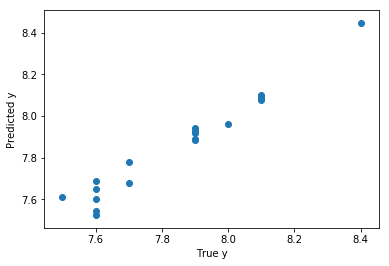

In [21]:
plt.scatter(y_test, predictions)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.show()

In [22]:
print ('Score:', model.score(X_test, y_test))  # R-squared is the default metric used by Sklearn. 

('Score:', 0.9567489050198752)


Our model performed pretty well. It was able to reach an **R-squared** of 0.96. This evaluation metric, R-squared, is a goodness-of-fit metric. It is the percentage of variation in our *y* variable explained by our model. For this regression problem, we could also have evaluated our model with Root Mean Squared Error and Adjusted R-squared. 

Model **evaluation metrics** are numerous. For classification problems, common evaluation metrics are **accuracy** and **ROC-AUC** scores. Evaluating your model is very important and learning more about the evaluation metrics is wise. 

Overall, I would use caution with these results. The features we have selected are likely **collinear**. Basically, collinearity is when you have features that are very similar or are giving us the same information about the dependent variable. The classic example of collinearity (perfect collinearity) is a feature that gives us a temperature in Celsius and another that reports Fahrenheit. One of these variables would be redundant. The features VotesUS and VotesnUS (votes non-US) could be very related. This could be a reason why we have such a high R-squared value. Luckily, we will use a non-parametric algorithm in Part 5. 

There are a few ways we could combat collinearity and the most basic of them would be to drop one of the Votes variables. There are other methods, like proxy variables, we could use to solve this collinearity problem. But we won’t get into those here (I seem to say that often). 

In [23]:
lm.coef_

array([-0.0896553 , -0.06837682,  0.05446931,  0.04932236,  0.34212889,
        1.0563298 ])

Before moving on to other models, I want to bring up the beta coefficients from our linear model. We see that the Votes outside the US had the largest positive impact on the IMDB rating. This form of inference is probably not a great idea because we don’t know if these coefficients are statistically significant or not. If you were trying to solve a regression inference problem, I would recommend using the Python library **Statsmodels**. The output from Statsmodels is an ANOVA table plus the coefficients and their associated p-values.

## 5) Secondary Modeling 

You can build hundreds of models and I have had friends model build and model tune for exorbitant amounts of time (cough_Costa_cough). Instead of going into every single regression model you could use in this scenario, I am going to use a Kaggle favorite, **Random Forests**. The Random Forests model is an ensemble model that uses many decision trees to classify or regress. The training algorithm uses bagging, which is a combination of bootstrap and aggregating. The Random Forest algorithm also has the benefit of being non-parametric. Since this isn’t a model tutorial (which may be fun to make), I am not going to get into specifics of this algorithm. Let’s just see how to use it in Scikit-Learn. 

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor()
model = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [26]:
print ('Score:', model.score(X_test, y_test))  # R-square is still the default for Sklearn. 

('Score:', 0.89816074950690261)


In [27]:
model.feature_importances_

array([ 0.02650514,  0.01299365,  0.01101865,  0.00981333,  0.03478461,
        0.90488462])

Whoa! Our Random Forest model did worse than our linear regression model. That’s a surprising result. That shows us the power of simple, easy-to-understand models like linear regression. If we look at the feature importance, we can see this Random Forest model agrees with our linear regression model that Votes outside the US matter a lot in predicting IMDB ratings. Our dataset is pretty small so this odd result could be a product of the small dataset. 

Alternatively, we have mentioned that our linear regression may suffer from high collinearity. In this scenario, I would trust the results of the random forest model over that of the linear regression because of this collinearity problem. 

Now there is a whole rabbit-hole of **parameter tuning** we could go down. Each algorithm is going to have a set of parameters you can optimize. With our Random Forest Model, I often experiment with the max depth and the learning rate. But as you can tell, these parameters are specific to your modeling algorithm so I won’t get into it here. I will mention **Grid Search**. Grid search allows you to vary the parameters in your model (thus creating multiple models), train those models, and evaluate each model using cross validation. Scikit-Learn has a GridSearchCV for this. When you decide to tune multiple parameters at one time, it may be beneficial to use grid search. 

What now?

## 6) Communicating Results 

In my mind there are two directions your data science project can go: the data science product and the data science report. 

First, you can create a **data science product**. Getting your model into production is, once again, a topic in itself. To begin with, you will need to move code from your Jupyter Notebook to scripts. In most firms, the data scientist will be working along side the software engineering team to write this code. The model will first need to be pickled and this can be accomplished with Scikit-Learn’s Joblib. Then we can use Flask and Heroku to create an application for your model. In this tutorial, I have elected to forgo this method. Developing data science products is a very useful skill and I myself am diving deeper into these processes. I encourage you to do the same!

Alternatively to the data product, you can create a **data science report**. You can showcase your results to the firm with a presentation and offer a technical overview on the process. Remember to keep your audience in mind. If you are presenting results to a room full of data scientists, go into detail. If you are advising the sales team, don’t talk about the universal approximation theorem for 45 minutes before explaining your results. To me, a data science report is a bit like a mini thesis. You are presenting a paper, which your peers (and bosses) will scrutinize and which you need to defend. 

If your company allows you to publish the results, I would recommend bringing your presentation to a data science meetup. Feedback on your project for the data science community at large is always a great learning experience. Check out **PyData** videos on YouTube if you want to see some excellent presentations. Additionally, write a **blog post** and push your code to **GitHub** so the data science community can learn from your success. Communicating your results is a part of the scientific process so don’t keep your findings hidden away!

## 7) Conclusion

I hope this workflow and mini-project was helpful for aspiring data scientists and people who work with data scientists. Like I mentioned a million times, there is a lot of detail that I glossed over here. Let me know if you have any questions or comments!

## 8) Resources

Idea for the workflow came from William Wolf (Platzi.com) and *Doing Data Science* by Cathy O’Neil and Rachel Schutt. 

*Elements of Statistical Learning* and *Introduction to Statistical Learning* are great texts that can offer more details about many of the topics I glossed over. 

h/t to Brice Wolfgang for editing.